<1> 
# Import libraries

#(Write code here)

In [4]:
import os, sys
import glob
import pandas as pd

# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

In [5]:
path =os.getcwd()
print (path)

C:\Users\Sunny\Desktop\data 690\CollegeScorecard_Raw_Data\CollegeScorecard_Raw_Data


# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

In [6]:
extension = 'csv'
result = glob.glob('*.{}'.format(extension))
print(result)

['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

In [22]:
frames=[]
for i in result:
    df = pd.read_csv(i, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN","ZIP"])
    print(i)
    frames.append(df)
print(frames)

MERGED1996_97_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
MERGED1999_00_PP.csv
MERGED2000_01_PP.csv
MERGED2001_02_PP.csv
MERGED2002_03_PP.csv
MERGED2003_04_PP.csv
MERGED2004_05_PP.csv
MERGED2005_06_PP.csv
MERGED2006_07_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
MERGED2009_10_PP.csv
MERGED2010_11_PP.csv
MERGED2011_12_PP.csv
MERGED2012_13_PP.csv
MERGED2013_14_PP.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MERGED2014_15_PP.csv
MERGED2015_16_PP.csv
MERGED2016_17_PP.csv
MERGED2017_18_PP.csv
MERGED2018_19_PP.csv
[      UNITID                                             INSTNM STABBR  \
0     100636                 Community College of the Air Force     AL   
1     100654                           Alabama A & M University     AL   
2     100663                University of Alabama at Birmingham     AL   
3     100672             ALABAMA AVIATION AND TECHNICAL COLLEGE     AL   
4     100690                                 Amridge University     AL   
5     100706                University of Alabama in Huntsville     AL   
6     100724                           Alabama State University     AL   
7     100751                          The University of Alabama     AL   
8     100760                  Central Alabama Community College     AL   
9     100812                            Athens State University     AL   
10    100830                    Auburn University at Montgomery     AL   
11    

In [8]:
fin = pd.concat(frames)

# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)


In [9]:
print (fin)

        UNITID                                             INSTNM STABBR  \
0       100636                 Community College of the Air Force     AL   
1       100654                           Alabama A & M University     AL   
2       100663                University of Alabama at Birmingham     AL   
3       100672             ALABAMA AVIATION AND TECHNICAL COLLEGE     AL   
4       100690                                 Amridge University     AL   
5       100706                University of Alabama in Huntsville     AL   
6       100724                           Alabama State University     AL   
7       100751                          The University of Alabama     AL   
8       100760                  Central Alabama Community College     AL   
9       100812                            Athens State University     AL   
10      100830                    Auburn University at Montgomery     AL   
11      100858                                  Auburn University     AL   
12      1009

the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)


In [10]:
fin1 = fin.loc[fin["INSTNM"] == 'University of Maryland-Baltimore County']

In [11]:
print(fin1)

      UNITID                                   INSTNM STABBR  REGION  \
2151  163268  University of Maryland-Baltimore County     MD     2.0   
2049  163268  University of Maryland-Baltimore County     MD     2.0   
1982  163268  University of Maryland-Baltimore County     MD     2.0   
1955  163268  University of Maryland-Baltimore County     MD     2.0   
1926  163268  University of Maryland-Baltimore County     MD     2.0   
1915  163268  University of Maryland-Baltimore County     MD     2.0   
1893  163268  University of Maryland-Baltimore County     MD     2.0   
1873  163268  University of Maryland-Baltimore County     MD     2.0   
1830  163268  University of Maryland-Baltimore County     MD     2.0   
1819  163268  University of Maryland-Baltimore County     MD     2.0   
1799  163268  University of Maryland-Baltimore County     MD     2.0   
1779  163268  University of Maryland-Baltimore County     MD     2.0   
1767  163268  University of Maryland-Baltimore County     MD    

In [12]:
fin1.count()

UNITID           23
INSTNM           23
STABBR           23
REGION           23
ADM_RATE         18
TUITIONFEE_IN    19
dtype: int64

In [14]:
# Using DataFrame.insert() to add a column 
fin1.insert(6, "Year", [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], True) 

In [15]:
fin1

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [16]:
 fin1.fillna(0)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2151,163268,University of Maryland-Baltimore County,MD,2.0,0.0000,0.0,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,0.0000,0.0,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,0.0000,0.0,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,0.0000,0.0,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,0.0000,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
21218

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

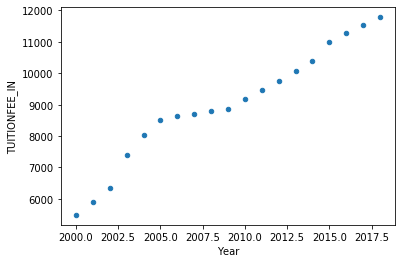

In [21]:
fin1.plot.scatter(x='Year',y='TUITIONFEE_IN')

Johns Hopkins University

In [23]:
fin2 = fin.loc[fin["INSTNM"] == 'Johns Hopkins University']

In [24]:
fin2

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0


In [25]:
fin2.count()

UNITID           23
INSTNM           23
STABBR           23
REGION           23
ADM_RATE         18
TUITIONFEE_IN    19
dtype: int64

In [26]:
fin2.insert(6, "Year", [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], True)

In [27]:
fin2

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


In [28]:
 fin2.fillna(0)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2139,162928,Johns Hopkins University,MD,2.0,0.0000,0.0,1996
2039,162928,Johns Hopkins University,MD,2.0,0.0000,0.0,1997
1973,162928,Johns Hopkins University,MD,2.0,0.0000,0.0,1998
1946,162928,Johns Hopkins University,MD,2.0,0.0000,0.0,1999
1917,162928,Johns Hopkins University,MD,2.0,0.0000,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


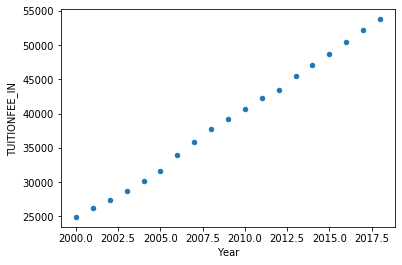

In [29]:
fin2.plot.scatter(x='Year',y='TUITIONFEE_IN')

In [68]:
df_percentage2= fin1[['TUITIONFEE_IN']] 


In [69]:
df_percentage2

,TUITIONFEE_IN
2151,NaN
2049,NaN
1982,NaN
1955,NaN
1926,5490.0
1915,5910.0
1893,6362.0
1873,7388.0
1830,8020.0
1819,8520.0


In [70]:
df_percentage2.pct_change()*100

,TUITIONFEE_IN
2151,NaN
2049,NaN
1982,NaN
1955,NaN
1926,NaN
1915,7.650273
1893,7.648054
1873,16.127004
1830,8.554413
1819,6.234414


In [72]:
df_percentage2.count()

TUITIONFEE_IN    19
dtype: int64

In [73]:
df_percentage2.insert(1, "Year", [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], True)

In [74]:
df_percentage2

,TUITIONFEE_IN,Year
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,5490.0,2000
1915,5910.0,2001
1893,6362.0,2002
1873,7388.0,2003
1830,8020.0,2004
1819,8520.0,2005


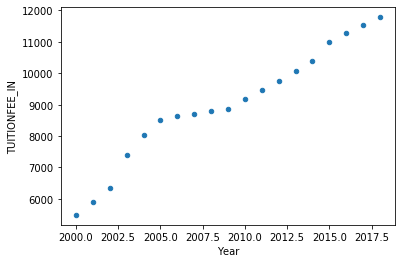

In [76]:
df_percentage2.plot.scatter(x='Year',y='TUITIONFEE_IN')

In [63]:
df_percentage3= fin2[['TUITIONFEE_IN']] 


In [64]:
df_percentage3

,TUITIONFEE_IN
2139,NaN
2039,NaN
1973,NaN
1946,NaN
1917,24930.0
1906,26210.0
1884,27390.0
1865,28730.0
1823,30140.0
1812,31620.0


In [66]:
df_percentage3.pct_change()*100

,TUITIONFEE_IN
2139,NaN
2039,NaN
1973,NaN
1946,NaN
1917,NaN
1906,5.134376
1884,4.502098
1865,4.892296
1823,4.907762
1812,4.910418


In [77]:
df_percentage3.count()

TUITIONFEE_IN    19
dtype: int64

In [78]:
df_percentage3.insert(1, "Year", [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], True)

In [80]:
df_percentage3

,TUITIONFEE_IN,Year
2139,NaN,1996
2039,NaN,1997
1973,NaN,1998
1946,NaN,1999
1917,24930.0,2000
1906,26210.0,2001
1884,27390.0,2002
1865,28730.0,2003
1823,30140.0,2004
1812,31620.0,2005


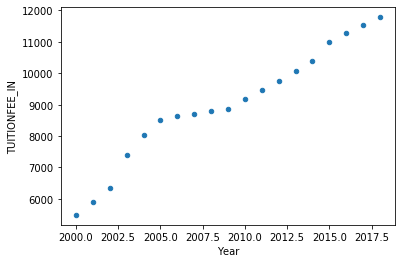

In [81]:
df_percentage2.plot.scatter(x='Year',y='TUITIONFEE_IN')